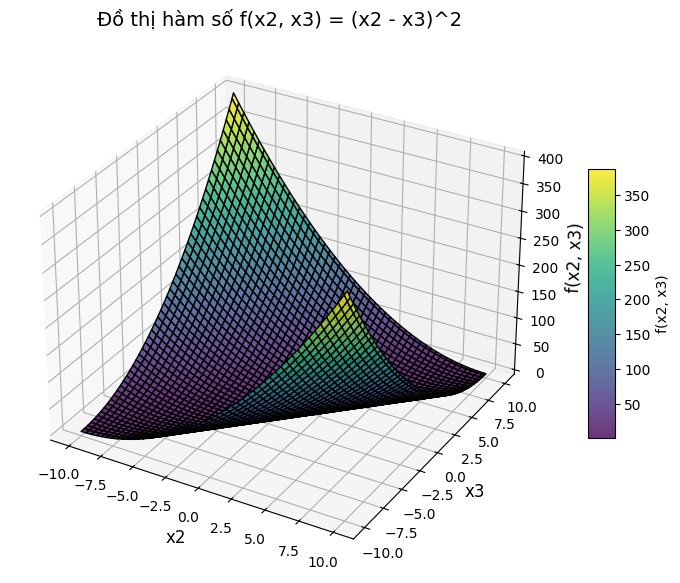

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo lưới giá trị cho x2 và x3
x2 = np.linspace(-10, 10, 100)
x3 = np.linspace(-10, 10, 100)
x2, x3 = np.meshgrid(x2, x3)

# Hàm số f(x2, x3) = (x2 - x3)^2 với x0 + x1 = 1
f = (x2 - x3)**2

# Vẽ đồ thị
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Tạo bề mặt 3D
surf = ax.plot_surface(x2, x3, f, cmap='viridis', edgecolor='k', alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=10, label="f(x2, x3)")

# Thiết lập nhãn
ax.set_title("Đồ thị hàm số f(x2, x3) = (x2 - x3)^2", fontsize=14)
ax.set_xlabel("x2", fontsize=12)
ax.set_ylabel("x3", fontsize=12)
ax.set_zlabel("f(x2, x3)", fontsize=12)

plt.show()


In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "k_means"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [16]:
# import pymysql
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import linear_kernel

# import warnings

# warnings.filterwarnings('ignore')

# server = 'localhost'
# database = 'webbanhang'
# username = 'root'
# password = ''


# try:
#     conn = pymysql.connect(host=server,
#                            user=username,
#                            password=password,
#                            database=database)
    

#     query = 'SELECT id, name, price, description, category_id FROM products'
#     df_products = pd.read_sql(query, conn)

# except pymysql.MySQLError as e:
#     print(f'Error: {e}')
    
# finally:
#     if conn:
#         conn.close()


# df_products['description'] = df_products['description'].fillna('No description available')

# tfidf = TfidfVectorizer(stop_words='english')
# tfidf_matrix = tfidf.fit_transform(df_products['description'])

# cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# def get_recommendations(product_name, cosine_sim=cosine_sim):
#     if product_name not in df_products['name'].values:
#         return f"Sản phẩm '{product_name}' không tồn tại trong danh sách sản phẩm."

#     idx = df_products.index[df_products['name'] == product_name][0]
#     sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#     sim_scores = sim_scores[1:6]
#     product_indices = [i[0] for i in sim_scores]
    
#     return df_products.iloc[product_indices][['name', 'price', 'description']]

# product_to_recommend = 'Iphone 16'
# recommended_products = get_recommendations(product_to_recommend)
# print(recommended_products)

In [3]:
import mysql.connector
import pandas as pd

# Kết nối tới database
conn = mysql.connector.connect(
    host="localhost",  # Địa chỉ máy chủ
    user="root",       # Tên người dùng
    password="",       # Mật khẩu
    database="webbanhang"  # Tên cơ sở dữ liệu
)

# Truy vấn dữ liệu từ bảng products và categories
query = 'SELECT products.id, products.name, products.price, categories.name as category_name FROM products JOIN categories ON products.category_id = categories.id'

df = pd.read_sql(query, conn)
print(df.head())

# Đóng kết nối
conn.close()

   id                name       price category_name
0   1           Iphone 16  20000000.0    Điện thoại
1   2  Samsung Galaxy S23  18000000.0    Điện thoại
2   3      Google Pixel 8  15000000.0    Điện thoại
3   4        Xiaomi Mi 13  12000000.0    Điện thoại
4   5          OnePlus 11  17000000.0    Điện thoại


C:\Users\Quan\AppData\Local\Temp\ipykernel_26064\1410666970.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Chuẩn bị dữ liệu: chỉ sử dụng cột giá cho clustering
X = df[['price']]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

print(df[['name', 'price', 'category_name', 'cluster']].head())

                 name       price category_name  cluster
0           Iphone 16  20000000.0    Điện thoại        2
1  Samsung Galaxy S23  18000000.0    Điện thoại        3
2      Google Pixel 8  15000000.0    Điện thoại        3
3        Xiaomi Mi 13  12000000.0    Điện thoại        3
4          OnePlus 11  17000000.0    Điện thoại        3


In [7]:
def recommend_products(product_id, df, num_recommendations=5):
    # Tìm cluster của sản phẩm hiện tại
    cluster = df.loc[df['id'] == product_id, 'cluster'].values[0]
    
    # Tìm các sản phẩm trong cùng cluster
    similar_products = df[df['cluster'] == cluster].sample(num_recommendations)
    
    return similar_products[['name', 'price', 'category_name']]

# Ví dụ: Gợi ý sản phẩm dựa trên sản phẩm có id = 1001
recommendations = recommend_products(1, df)
print(recommendations)

                name       price category_name
34      Acer Swift 5  30000000.0        Laptop
8         Huawei P50  21000000.0    Điện thoại
5    Sony Xperia 1 V  22000000.0    Điện thoại
106  Samsung QLED 4K  25000000.0          Tivi
20    Iphone 16 Plus  22000000.0    Điện thoại


Kết nối tới cơ sở dữ liệu

In [20]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('mysql+pymysql://root:@localhost/webbanhang')

tải dữ liệu của các bảng

In [21]:
users_df = pd.read_sql('SELECT * FROM users', engine)
products_df = pd.read_sql('SELECT * FROM products', engine)
categories_df = pd.read_sql('SELECT * FROM categories', engine)
orders_df = pd.read_sql('SELECT * FROM orders', engine)
order_details_df = pd.read_sql('SELECT * FROM order_details', engine)

In [22]:
# Gộp products với categories
products_categories_df = pd.merge(products_df, categories_df, left_on='category_id', right_on='id', suffixes=('_product', '_category'))

# Gộp order_details với products
order_details_products_df = pd.merge(order_details_df, products_categories_df, left_on='product_id', right_on='id_product')

# Gộp orders với order_details
orders_details_products_df = pd.merge(orders_df, order_details_products_df, left_on='id', right_on='order_id')

# Gộp users với orders
complete_data = pd.merge(orders_details_products_df, users_df, left_on='user_id', right_on='id', suffixes=('_order', '_user'))


In [23]:
complete_data.to_csv('complete_customer_data.csv', index=False)
